# Tarea

Dentro de esta carpeta se encuentra un directorio llamado "escuelas_privadas.geojson". Tendras que realizar la lectura, graficas y analisis de alguna de las alcalidas.

Paso 1. Guarda el geojson en un dataframe e imprimelo. 

In [15]:
import geopandas as gpd
import os
import geodatasets as gds
from shapely.geometry import Point

df=gpd.read_file('escuelas_privadas.geojson')
df.head()

,nombre,nivel,turno,sstnmnt,domicil,ubicacn,colonia,alcaldi,geometry
0,CENDI PART SEDI LOMAS,INICIAL,MATUTINO,Particular,EXPLANADA NO. 305,"EXPLANADA NO. 305, LOMAS DE CHAPULTEPEC, MIGUE...",LOMAS DE CHAPULTEPEC,MIGUEL HIDALGO,POINT (-99.21115 19.42515)
1,ARMONIA INFANTIL,INICIAL,MATUTINO,Particular,AV. SINATEL No 38 MZ. 4 LT. 21,"AV. SINATEL No 38 MZ. 4 LT. 21, SINATEL AMPLIA...",SINATEL (AMPL),IZTAPALAPA,POINT (-99.13180 19.36483)
2,CENDI PART. COLEGIO DE LAS BALEARES,INICIAL,TIEMPO COMPLETO,Particular,JOSEFA ORTIZ DE DOMINGUEZ NO 2,"JOSEFA ORTIZ DE DOMINGUEZ NO 2, TIZAPAN, ALVAR...",TIZAPAN_TIZAPAN SAN ANGEL,ALVARO OBREGON,POINT (-99.20264 19.33517)
3,"CENDI PART COLEGIO CIBELES, S.C.",INICIAL,MATUTINO,Particular,RIO GRIJALVA NUM 27,"RIO GRIJALVA NUM 27, CUAUHTEMOC, CUAUHTEMOC",CUAUHTEMOC,CUAUHTEMOC,POINT (-99.17015 19.43364)
4,CENTRO DE DESARROLLO INFANTIL KINDERGARDEN,INICIAL,TIEMPO COMPLETO,Particular,CALLE 11 DE ENERO DE 1861 NO. 2114,"CALLE 11 DE ENERO DE 1861 NO. 2114, LEYES DE R...",LEYES DE REFORMA 3A SECCION I,IZTAPALAPA,POINT (-99.06610 19.38264)


Paso 2. Crea otro gdf con solo las escuelas en la delegacion Miguel Hidalgo

In [16]:
dfcop=df.copy()
mh=dfcop[dfcop['alcaldi'] == 'MIGUEL HIDALGO']
mh.head()

,nombre,nivel,turno,sstnmnt,domicil,ubicacn,colonia,alcaldi,geometry
0,CENDI PART SEDI LOMAS,INICIAL,MATUTINO,Particular,EXPLANADA NO. 305,"EXPLANADA NO. 305, LOMAS DE CHAPULTEPEC, MIGUE...",LOMAS DE CHAPULTEPEC,MIGUEL HIDALGO,POINT (-99.21115 19.42515)
11,COLEGIO SAN AGUSTIN,INICIAL,TIEMPO COMPLETO,Particular,MUSSET NUM 218,"MUSSET NUM 218, POLANCO REFORMA, MIGUEL HIDALGO",POLANCO REFORMA (POLANCO),MIGUEL HIDALGO,POINT (-99.19684 19.43510)
14,ESTANCIA INFANTIL PRIMAVERA,INICIAL,MATUTINO,Particular,LAGO MAYOR N¦ 186,"LAGO MAYOR N¦ 186, ANAHUAC I, MIGUEL HIDALGO",ANAHUAC LOS MANZANOS,MIGUEL HIDALGO,POINT (-99.18606 19.44530)
19,CENTRO DE DESARROLLO INFANTIL UNA SEMILLA DE L...,INICIAL,TIEMPO COMPLETO,Particular,VICTOR HUGO NUM 33,"VICTOR HUGO NUM 33, ANZURES, MIGUEL HIDALGO",ANZURES,MIGUEL HIDALGO,POINT (-99.17657 19.42781)
33,PROINFANCIA TERESITA,INICIAL,TIEMPO COMPLETO,Particular,LAPLACE NO. 31,"LAPLACE NO. 31, NUEVA ANZURES, MIGUEL HIDALGO",ANZURES,MIGUEL HIDALGO,POINT (-99.17908 19.43530)


Paso 3. Setea el indice para que ahora sea la colonia

In [17]:
df.set_index('colonia', inplace=True)
df.head()

,nombre,nivel,turno,sstnmnt,domicil,ubicacn,alcaldi,geometry
colonia,,,,,,,,
LOMAS DE CHAPULTEPEC,CENDI PART SEDI LOMAS,INICIAL,MATUTINO,Particular,EXPLANADA NO. 305,"EXPLANADA NO. 305, LOMAS DE CHAPULTEPEC, MIGUE...",MIGUEL HIDALGO,POINT (-99.21115 19.42515)
SINATEL (AMPL),ARMONIA INFANTIL,INICIAL,MATUTINO,Particular,AV. SINATEL No 38 MZ. 4 LT. 21,"AV. SINATEL No 38 MZ. 4 LT. 21, SINATEL AMPLIA...",IZTAPALAPA,POINT (-99.13180 19.36483)
TIZAPAN_TIZAPAN SAN ANGEL,CENDI PART. COLEGIO DE LAS BALEARES,INICIAL,TIEMPO COMPLETO,Particular,JOSEFA ORTIZ DE DOMINGUEZ NO 2,"JOSEFA ORTIZ DE DOMINGUEZ NO 2, TIZAPAN, ALVAR...",ALVARO OBREGON,POINT (-99.20264 19.33517)
CUAUHTEMOC,"CENDI PART COLEGIO CIBELES, S.C.",INICIAL,MATUTINO,Particular,RIO GRIJALVA NUM 27,"RIO GRIJALVA NUM 27, CUAUHTEMOC, CUAUHTEMOC",CUAUHTEMOC,POINT (-99.17015 19.43364)
LEYES DE REFORMA 3A SECCION I,CENTRO DE DESARROLLO INFANTIL KINDERGARDEN,INICIAL,TIEMPO COMPLETO,Particular,CALLE 11 DE ENERO DE 1861 NO. 2114,"CALLE 11 DE ENERO DE 1861 NO. 2114, LEYES DE R...",IZTAPALAPA,POINT (-99.06610 19.38264)


Paso 3. Grafica el dataframe

<Axes: >

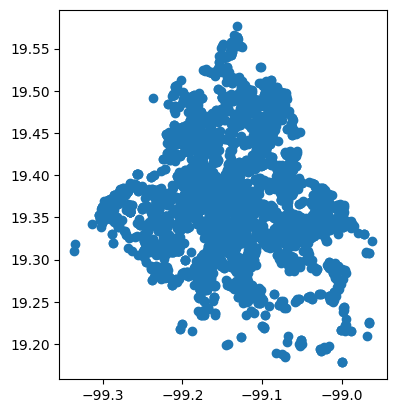

In [18]:
df.plot()

Paso 4. Crea dos nuevas columnas en el gdf original que sean para el area y el perimetro, en ellas haz tu calculo de cada una.

In [19]:
df1=df.copy()
df1['area'] = df.geometry.area
df1['perimeter']=df.geometry.length
df1.head()

C:\Users\santi\AppData\Local\Temp\ipykernel_3288\871618584.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df1['area'] = df.geometry.area
C:\Users\santi\AppData\Local\Temp\ipykernel_3288\871618584.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df1['perimeter']=df.geometry.length


,nombre,nivel,turno,sstnmnt,domicil,ubicacn,alcaldi,geometry,area,perimeter
colonia,,,,,,,,,,
LOMAS DE CHAPULTEPEC,CENDI PART SEDI LOMAS,INICIAL,MATUTINO,Particular,EXPLANADA NO. 305,"EXPLANADA NO. 305, LOMAS DE CHAPULTEPEC, MIGUE...",MIGUEL HIDALGO,POINT (-99.21115 19.42515),0.0,0.0
SINATEL (AMPL),ARMONIA INFANTIL,INICIAL,MATUTINO,Particular,AV. SINATEL No 38 MZ. 4 LT. 21,"AV. SINATEL No 38 MZ. 4 LT. 21, SINATEL AMPLIA...",IZTAPALAPA,POINT (-99.13180 19.36483),0.0,0.0
TIZAPAN_TIZAPAN SAN ANGEL,CENDI PART. COLEGIO DE LAS BALEARES,INICIAL,TIEMPO COMPLETO,Particular,JOSEFA ORTIZ DE DOMINGUEZ NO 2,"JOSEFA ORTIZ DE DOMINGUEZ NO 2, TIZAPAN, ALVAR...",ALVARO OBREGON,POINT (-99.20264 19.33517),0.0,0.0
CUAUHTEMOC,"CENDI PART COLEGIO CIBELES, S.C.",INICIAL,MATUTINO,Particular,RIO GRIJALVA NUM 27,"RIO GRIJALVA NUM 27, CUAUHTEMOC, CUAUHTEMOC",CUAUHTEMOC,POINT (-99.17015 19.43364),0.0,0.0
LEYES DE REFORMA 3A SECCION I,CENTRO DE DESARROLLO INFANTIL KINDERGARDEN,INICIAL,TIEMPO COMPLETO,Particular,CALLE 11 DE ENERO DE 1861 NO. 2114,"CALLE 11 DE ENERO DE 1861 NO. 2114, LEYES DE R...",IZTAPALAPA,POINT (-99.06610 19.38264),0.0,0.0


Paso 5. Crea una nueva columna en el gdf del paso 1 que se llame distancia; después escoge una escuela del data frame y que la nueva columna tenga la distancia de todas las escuelas a la que escogiste 

In [20]:
chosen_school_coords = (-99.17657, 19.34536)
chosen_school = Point(chosen_school_coords)
df['distance'] = df['geometry'].apply(lambda school: school.distance(chosen_school))
df.head()

,nombre,nivel,turno,sstnmnt,domicil,ubicacn,alcaldi,geometry,distance
colonia,,,,,,,,,
LOMAS DE CHAPULTEPEC,CENDI PART SEDI LOMAS,INICIAL,MATUTINO,Particular,EXPLANADA NO. 305,"EXPLANADA NO. 305, LOMAS DE CHAPULTEPEC, MIGUE...",MIGUEL HIDALGO,POINT (-99.21115 19.42515),0.086966
SINATEL (AMPL),ARMONIA INFANTIL,INICIAL,MATUTINO,Particular,AV. SINATEL No 38 MZ. 4 LT. 21,"AV. SINATEL No 38 MZ. 4 LT. 21, SINATEL AMPLIA...",IZTAPALAPA,POINT (-99.13180 19.36483),0.048818
TIZAPAN_TIZAPAN SAN ANGEL,CENDI PART. COLEGIO DE LAS BALEARES,INICIAL,TIEMPO COMPLETO,Particular,JOSEFA ORTIZ DE DOMINGUEZ NO 2,"JOSEFA ORTIZ DE DOMINGUEZ NO 2, TIZAPAN, ALVAR...",ALVARO OBREGON,POINT (-99.20264 19.33517),0.027989
CUAUHTEMOC,"CENDI PART COLEGIO CIBELES, S.C.",INICIAL,MATUTINO,Particular,RIO GRIJALVA NUM 27,"RIO GRIJALVA NUM 27, CUAUHTEMOC, CUAUHTEMOC",CUAUHTEMOC,POINT (-99.17015 19.43364),0.088513
LEYES DE REFORMA 3A SECCION I,CENTRO DE DESARROLLO INFANTIL KINDERGARDEN,INICIAL,TIEMPO COMPLETO,Particular,CALLE 11 DE ENERO DE 1861 NO. 2114,"CALLE 11 DE ENERO DE 1861 NO. 2114, LEYES DE R...",IZTAPALAPA,POINT (-99.06610 19.38264),0.116588


Paso 6. Realiza una consulta para saber cuales son las 3 escuelas mas lejos del punto que elegiste, debe imprimir solamente el nombre de las escuelas y su distancia al punto

In [21]:
farthest = df.nlargest(3, 'distance')
print(farthest[['geometry', 'distance']])

                                               geometry  distance
colonia                                                          
EMILIANO ZAPATA 2A           POINT (-98.96802 19.20915)  0.249087
SANTA ANA TLACOTENCO (PBLO)  POINT (-98.99949 19.17820)  0.243515
SANTA ANA TLACOTENCO (PBLO)  POINT (-98.99949 19.17820)  0.243515


Paso 7. Agrupa las escuelas por su alcaldia. Una vez hecho eso crea una nueva geometria que "envuelva" a las escuelas de cada alcaldia y graficalos

<Axes: >

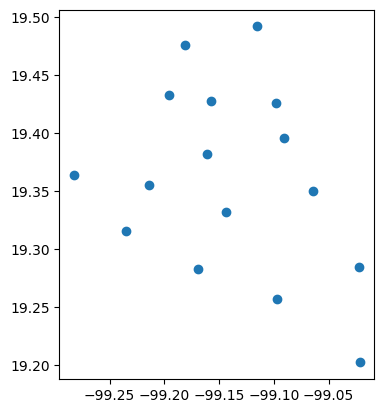

In [22]:
grouped_by_alcaldi = df.groupby('alcaldi')['geometry'].apply(lambda x: Point(x.x.mean(), x.y.mean()))
new_df = gpd.GeoDataFrame(geometry=grouped_by_alcaldi, crs=df.crs)
new_df['alcaldi'] = new_df.index  # Set 'alcaldi' as a regular column
new_df.plot()

El paso anterior guardalo como una capa y graficalo en conjunto a la grafica del paso 1

<Axes: >

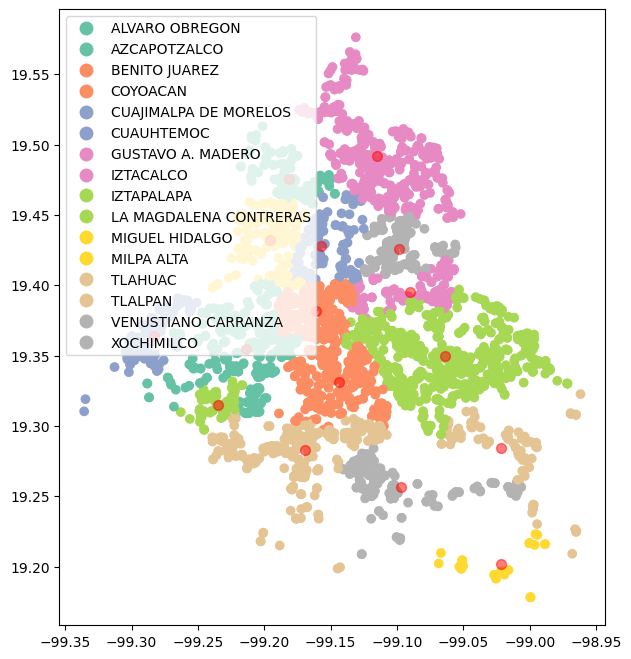

In [23]:
grouped_by_alcaldi.to_file('new_layer.geojson', driver='GeoJSON')
ax = df.plot(figsize=(10, 8), legend=True, column='alcaldi', cmap='Set2')
new_df.plot(ax=ax, color='red', marker='o', markersize=50, alpha=0.5)

Paso 8. Crea una nueva columna en el gdf inicial llamada 'Calidad_escuela' que imprima un numero aleatorio entre 1 y 10. 
Imprime el gdf


In [24]:
import numpy as np

df['quality'] = np.random.randint(1, 11, size=len(df))
df.head()

,nombre,nivel,turno,sstnmnt,domicil,ubicacn,alcaldi,geometry,distance,quality
colonia,,,,,,,,,,
LOMAS DE CHAPULTEPEC,CENDI PART SEDI LOMAS,INICIAL,MATUTINO,Particular,EXPLANADA NO. 305,"EXPLANADA NO. 305, LOMAS DE CHAPULTEPEC, MIGUE...",MIGUEL HIDALGO,POINT (-99.21115 19.42515),0.086966,1
SINATEL (AMPL),ARMONIA INFANTIL,INICIAL,MATUTINO,Particular,AV. SINATEL No 38 MZ. 4 LT. 21,"AV. SINATEL No 38 MZ. 4 LT. 21, SINATEL AMPLIA...",IZTAPALAPA,POINT (-99.13180 19.36483),0.048818,2
TIZAPAN_TIZAPAN SAN ANGEL,CENDI PART. COLEGIO DE LAS BALEARES,INICIAL,TIEMPO COMPLETO,Particular,JOSEFA ORTIZ DE DOMINGUEZ NO 2,"JOSEFA ORTIZ DE DOMINGUEZ NO 2, TIZAPAN, ALVAR...",ALVARO OBREGON,POINT (-99.20264 19.33517),0.027989,6
CUAUHTEMOC,"CENDI PART COLEGIO CIBELES, S.C.",INICIAL,MATUTINO,Particular,RIO GRIJALVA NUM 27,"RIO GRIJALVA NUM 27, CUAUHTEMOC, CUAUHTEMOC",CUAUHTEMOC,POINT (-99.17015 19.43364),0.088513,5
LEYES DE REFORMA 3A SECCION I,CENTRO DE DESARROLLO INFANTIL KINDERGARDEN,INICIAL,TIEMPO COMPLETO,Particular,CALLE 11 DE ENERO DE 1861 NO. 2114,"CALLE 11 DE ENERO DE 1861 NO. 2114, LEYES DE R...",IZTAPALAPA,POINT (-99.06610 19.38264),0.116588,5


Paso 9. Ahora, plotea el gdf, pero vusalizando la columna 'Calidad escuela'

<Axes: >

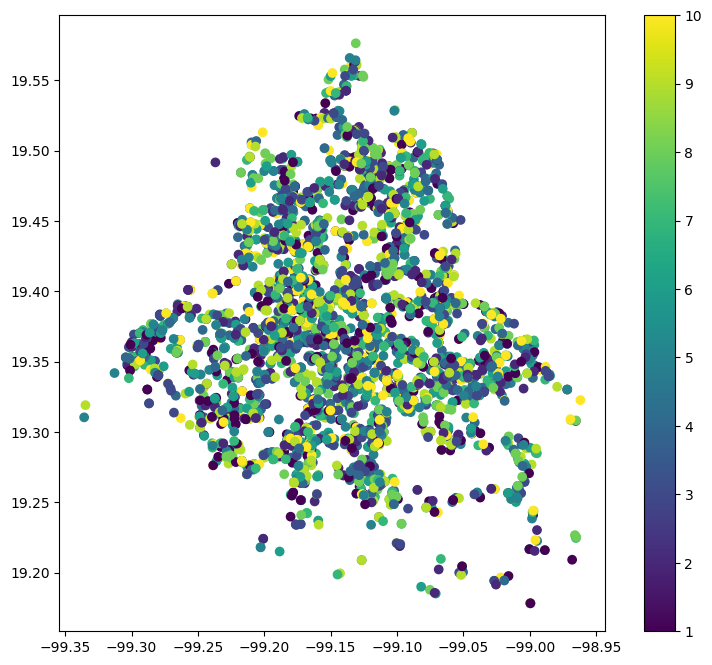

In [25]:
df.plot(figsize=(10, 8), column='quality', legend=True, cmap='viridis')

Paso 10. Finalmente, plotea en escala de Rojos, en cuantiles de 4 categorias.
Recuerda que los colores deben de ser claros, inserta una leyenda

ImportError: The 'mapclassify' package (>= 2.4.0) is required to use the 'scheme' keyword.

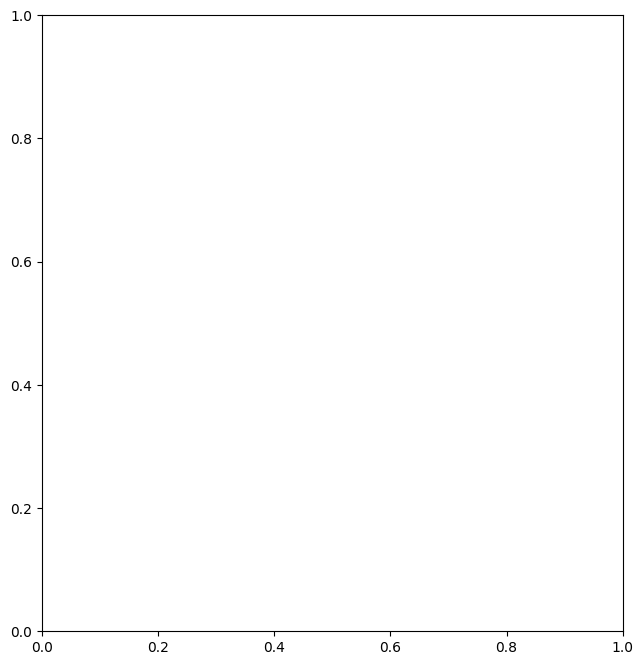

In [28]:
ax = df.plot(figsize=(10, 8), column='quality', legend=True, cmap='Reds', scheme='quantiles', k=4)
ax.set_title('School Quality')